## Align reads to human genome to remove contamination:

**Terminal:** bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S humanoutput.sam --un humanunaligned.fastq 

**Output**
1124714 reads; of these:  
1124714 (100.00%) were unpaired; of these:  
1028379 (91.43%) aligned 0 times      
87274 (7.76%) aligned exactly 1 time     
9061 (0.81%) aligned >1 times     
8.57% overall alignment rate  

### Try to adjust the parameter to "--very-sensitive"

**Terminal:** bowtie2 -p 4 --very-sensitive --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S humanoutput2.sam --un unaligned2.fastq

**Output**  
1124714 reads; of these:  
1124714 (100.00%) were unpaired; of these:  
1028330 (91.43%) aligned 0 times  
86198 (7.66%) aligned exactly 1 time  
10186 (0.91%) aligned >1 times  
8.57% overall alignment rate

> **The percentage of reads that map to humans.**  
</Br>
The overall alignment rate is 8.57%, which means that there are 8.57% of the reads contaminated by human genome.

>**The change of parameter will influence the output.**  
</Br>
From changing "--very-fast" to "--very-sensitive", though the overall alignment rate doesn't change, the percentage that reads aligned >1 times increases from 0.81% to 0.91%, which seems to generate a more accurate outcome.

### Align the filtered reads to the S. oneidensis reference genome

**Terminal:** bowtie2 -p 4 --very-sensitive --no-unal
-x /data/lab6/shewanella_oneidensis_mr-1  -U filtered.fastq -S S.oneid-x /data/ -U filtered.fastq -S S.oneidensisoutput.sam  --u
ensisoutput.sam  --un unaligned2.fastq

**Output**  
1028330 reads; of these:  
1028330 (100.00%) were unpaired; of these:  
298063 (28.99%) aligned 0 times     
688180 (66.92%) aligned exactly 1 time     
42087 (4.09%) aligned >1 times    
71.01% overall alignment rate

> **The percentage of filtered reads that map to S. oneidensis.**  
<Br.>
The overall alignment rate is 71.01%, much higher than the one, which raw reads map to human genome.

## Generate a coverage plot:

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from operator import add
%matplotlib inline

In [131]:
rawdata = open("pileup.tab").readlines() # To see what is in the '.tab' format file.
for i in range(10):
    print(rawdata[i])
rawdata[100]

AE014299.2	1	0

AE014299.2	2	1

AE014299.2	3	2

AE014299.2	4	2

AE014299.2	5	2

AE014299.2	6	2

AE014299.2	7	2

AE014299.2	8	2

AE014299.2	9	2

AE014299.2	10	2



'AE014299.2\t101\t8\n'

In [132]:
plot_data = [[],[]]
for i in rawdata:
    temp = i.split("\t")
    x = int(temp[1])
    y = int(temp[2].strip())
    plot_data[0].append(x)
    plot_data[1].append(y)
max(plot_data[1])

281

In [137]:
addup = 0
for i in plot_data[1]:
    addup += i
average = addup // len(plot_data[1])
print('The maximum coverage is:', max(plot_data[1]))
print('The minimum coverage is:', min(plot_data[1]))
print('The minimum coverage is:', average)

The maximum coverage is: 281
The minimum coverage is: 0
The minimum coverage is: 37


In [79]:
np_data = np.array(plot_data)
np_data

array([[      1,       2,       3, ..., 4969809, 4969810, 4969811],
       [      0,       1,       2, ...,       4,       3,       1]])

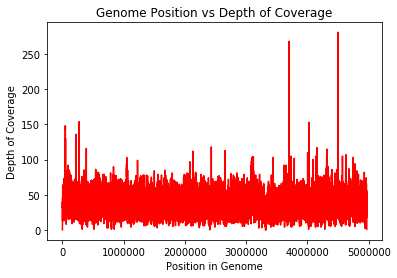

In [80]:
plt.plot(np_data[0],np_data[1], color = "red")
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')
plt.title('Genome Position vs Depth of Coverage')
plt.show()

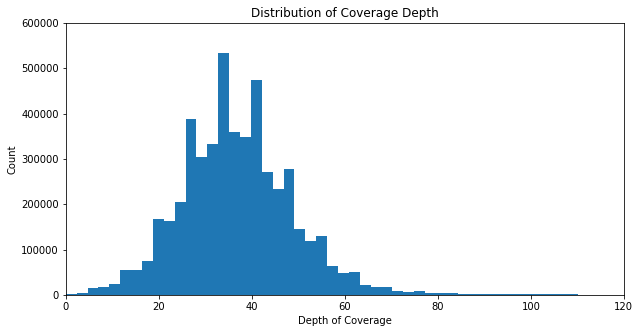

In [152]:
plt.figure(figsize=[10,5])
plt.hist(np_data[1],120)
plt.axis([0, 120, 0, 600000])
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.title('Distribution of Coverage Depth')
plt.show()

## Extra Credit 1:

In [113]:
rawdata = open("jamie.tab").readlines()
rawdata[10] # To see how the data looks like in the '.tab' file.

'chr1\t16533\t1\n'

In [114]:
rawdata = open("jamie.tab").readlines()
count_all = []
depth_all =[]
for num in range(1,23):
    count = 0
    depth_oc = 0
    for i in rawdata:
        if "chr%d" %num in i:
            temp = i.split("\t")
            depth = int(temp[2].strip())
            count += 1
            depth_oc += depth
    count_all.append(count)
    depth_all.append(depth_oc)
 # Generate two lists, 'count_all' includes the count of length of chromosomes, 'depth_all' includes depth for each chromosome.

In [115]:
for letter in ['X','Y']:
    count = 0
    depth_oc = 0
    for i in rawdata:
        if "chr%s" %letter in i:
            temp = i.split("\t")
            depth= int(temp[2].strip())
            count += 1
            depth_oc += depth
    count_all.append(count)
    depth_all.append(depth_oc)

In [116]:
len(count_all)
# The data includes 24 chromosomes.

24

In [117]:
len(depth_all)

24

In [118]:
average_depth = [] # Calculate the average depth of each chromosome.
for i in range(24):
    average_depth.append(depth_all[i]/count_all[i])
print(average_depth)

[0.9999683053424431, 1.000033137320247, 0.9999736113345408, 0.9999678523357649, 0.9999666274539251, 0.9999763697845161, 1.0000012755679626, 0.9999681397639295, 0.9999644073324206, 0.99995242543442, 0.9999622839056374, 1.0000136463192466, 0.9999720813941104, 0.9999686559679037, 0.9999576194737307, 0.9999723608368134, 0.999975887100868, 0.9999073353348901, 0.9999519836957972, 0.9999550348479928, 0.9999886363959193, 1.0006911633071598, 0.9999781456808912, 1.0009386977106434]


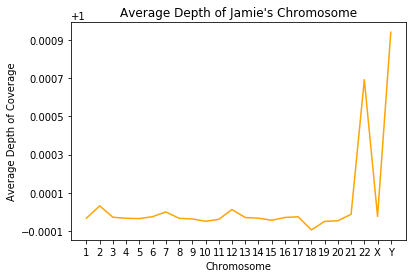

In [121]:
X_axis = [_ for _ in range(1,23)] + ['X', 'Y']
plt.plot(X_axis, average_depth, color = "orange")
plt.yticks(np.arange(0.9999, 1.001, step = 0.0002))
plt.xlabel('Chromosome')
plt.ylabel('Average Depth of Coverage')
plt.title("Average Depth of Jamie's Chromosome")
plt.show()


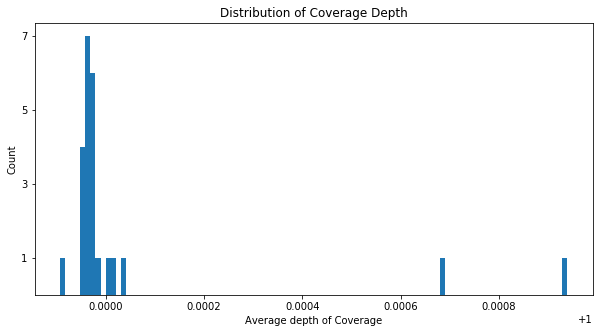

In [157]:
plt.figure(figsize=[10,5])
plt.hist(average_depth,100)
plt.xlabel('Average depth of Coverage')
plt.ylabel('Count')
plt.yticks(np.arange(1,9,step = 2))
plt.title('Distribution of Coverage Depth')
plt.show()

In [166]:
print("The length of Jamie's X chromosome is:", count_all[22])
print("The length of Jamie's Y chromosome is:", count_all[23])
print("The ratio of the length of X and Y chromosome is:", "%.2f : 1" % (count_all[22]/count_all[23]))

The length of Jamie's X chromosome is: 1509999
The length of Jamie's Y chromosome is: 243955
The ratio of the length of X and Y chromosome is: 6.19 : 1


### The biological gender of Jamie.
According to [ResearchGate](https://www.researchgate.net/figure/Relative-sizes-of-the-X-and-Y-chromosomes-in-human-H-sapiens-mouse-Mus-musculus_fig3_259723517), the document size of X chromosome is 155.3Mb, and the document of Y chromosome is 59.4Mb. Therefore, for a normal male, threoretical length ratio of X and Y chromosome should be 2.61:1. 

For Jamie, the ratio of the length of X and Y chromosome is up to 6.19 : 1, so, it is believed that Jamie is a male, but maybe with a genetype of XXY.

### Extra Credit 2

In [170]:
plot_data[1].index(max(plot_data[1]))
# Obtain the position of the highest depth.

4498947

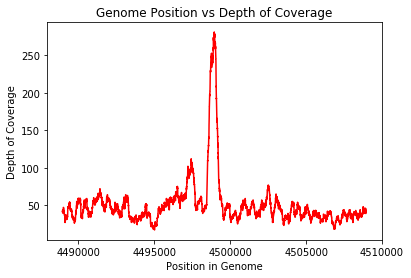

In [177]:
plt.plot(np_data[0][4488947:4508947],np_data[1][4488947:4508947], color = "red")
plt.xlabel('Position in Genome')
plt.xticks(np.arange(4490000, 4515000, step = 5000))
plt.ylabel('Depth of Coverage')
plt.title('Genome Position vs Depth of Coverage')
plt.show()
# "Zoom in" the extra high depth of coverage region.

### Terminal 
samtools view -b S.oneidensisoutput.sorted.bam AE014299.2:4498948-4498948 > AE.bam  
samtools view AE.bam

**Output**  
read593286      0       AE014299.2      4498948 1       300M    *       0       0       CTCAACGGCAACGTGGGCACCGGCGGCCAGGACACTGCGCCGGTCGACACCCAGGCCCCGAGCGTGGTGGTCAACATCGTTGACGACAAGCTGACTGTGGGCGAGACCAGCGAGGTCACCTTCACCTTCAGCGAGAAGGTCAAAGACTTCGAAGTGGGCGACCTGACCGTGGTGGGCGGCACTGTTACCGACCTCAAGACCACCGACGGCGGCAAGACCTGGAACGGGACCTTCACGCCGACCCCAAGCTTCACTGGCACCGCCAGCGTCACCGTGAACAACACCAGCTACCCCGACCTC    CCCCCGGDGGGGGGFGGGGGGDCFEFFGCFFGGGGGGGGGGEGFGEGGGGGGCFGGGGG@CFFFGGGGGGGGGGGGGGGGG8FGGGGGGBEGDFGGGG<E7=FGGFGGG?FFF<<FFEGGGGGGGG9DFFDFEEBFECDGGEGGCFFBFGCFF:<F<*=CFGEGGC2?FFF:B:>GGGGD?C@ECG<+3;;:?CC<C<C;0;;;2::22CED>:>1;;C8;;2+02:5/1?E?8@F88C822C*81*/2ACF?:F+2A8<5*:CE*;*1:/;C*22//<<0/**2*1/30+01*//*2:C    AS:i:-14        XS:i:-14        XN:i:0  XM:i:6  XO:i:0  XG:i:0  NM:i:6 MD:Z:223C22G35G0G7A4T3   YT:Z:UU

## The BLAST results is shown as follows:
![](https://i.imgur.com/vvfXXSl.png)